In [1]:
from real_datasets import BreastCancerDataset, WineQualityRedDataset, WineQualityWhiteDataset, SouthGermanCreditDataset, CropMappingDataset

In [1]:
from solvers import gurobi_solver, cplex_solver

In [3]:
bc = BreastCancerDataset()
wqr = WineQualityRedDataset()
wqw = WineQualityWhiteDataset()
sgc = SouthGermanCreditDataset()
cm = CropMappingDataset()

In [4]:
ls = [bc, wqr, wqw, sgc, cm]

In [5]:
final_res = []

In [6]:
for idx, dataset in enumerate(ls):
    print(idx)
    P, N = dataset.generate()
    t0, t1, t, l = dataset.params()
    res_gurobi = gurobi_solver(theta=t, P=P, N=N, lambda_param=l)
    res_cplex = cplex_solver(theta=t, P=P, N=N, lambda_param=l)
    final_res.append([res_gurobi, res_cplex])
    
   
    

0
Set parameter LicenseID to value 2604237
Set parameter LicenseID to value 2604237
Set parameter TimeLimit to value 120
Version identifier: 22.1.1.0 | 2022-11-28 | 9160aff4d
CPXPARAM_MIP_Display                             0
CPXPARAM_TimeLimit                               120
CPXPARAM_WorkMem                                 4096
1
Set parameter LicenseID to value 2604237
Set parameter TimeLimit to value 120
Version identifier: 22.1.1.0 | 2022-11-28 | 9160aff4d
CPXPARAM_MIP_Display                             0
CPXPARAM_TimeLimit                               120
CPXPARAM_WorkMem                                 4096
2
Set parameter LicenseID to value 2604237
Set parameter TimeLimit to value 120
Version identifier: 22.1.1.0 | 2022-11-28 | 9160aff4d
CPXPARAM_MIP_Display                             0
CPXPARAM_TimeLimit                               120
CPXPARAM_WorkMem                                 4096
3
Set parameter LicenseID to value 2604237
Set parameter TimeLimit to value 120
Ver

In [7]:
for i in final_res:
    print(i[0]['Reach'], i[0]['Time taken'])
    print(i[1]['Reach'], i[1]['Time taken'])

357.0 0.05709576606750488
357.0 0.06382322311401367
18.0 0.05182337760925293
18.0 2.0528039932250977
20.0 120.00595831871033
62.0 120.03052091598511
40.0 120.00442957878113
165.0 120.0140130519867
2674.0 15.986196994781494
2674.0 46.386996269226074


In [2]:
from synthetic_datasets import ClusterDataset, TwoClusterDataset, DiffusedBenchmark, PrismDataset, L1PrismDataset

In [3]:
cd = ClusterDataset()
tc = TwoClusterDataset() 
db = DiffusedBenchmark() 
pd = PrismDataset()
l1 = L1PrismDataset()

2


In [4]:
sds = [ l1]
# sds = [cd, tc, pd]

In [5]:
sy_final_res = []

In [6]:
for idx, dataset in enumerate(sds):
    print(idx)
    P, N = dataset.generate()
    t0, t1, t, l = dataset.params()
    res_gurobi = gurobi_solver(theta=t, P=P, N=N, lambda_param=l)
    res_cplex = cplex_solver(theta=t, P=P, N=N, lambda_param=l)
    print(res_gurobi['Reach'], res_cplex['Reach'])
    
   
    

0
Set parameter LicenseID to value 2604237
Set parameter LicenseID to value 2604237
Set parameter TimeLimit to value 120
Version identifier: 22.1.1.0 | 2022-11-28 | 9160aff4d
CPXPARAM_MIP_Display                             0
CPXPARAM_TimeLimit                               120
CPXPARAM_WorkMem                                 4096
1.0 1.0


In [7]:
sy_final_res

[]

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
from utils import plot_P_N

In [10]:
P, N = l1.generate()

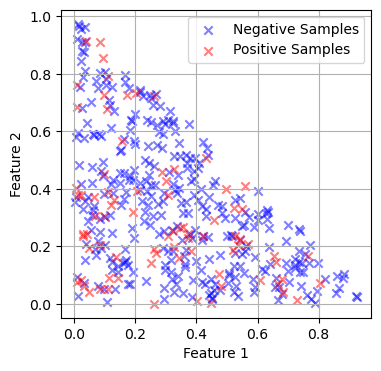

In [11]:
plot_P_N(P, N)

In [ ]:
P, N

In [ ]:
import numpy as np
X = np.vstack((P, N)) 
y = np.hstack((np.ones(len(P)), np.zeros(len(N))))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  
from gurobipy import Model, GRB, quicksum

# def generate_custom_2_cluster_data(n_negative=320, n_positive=80, d=2):
#     negative_samples = np.random.rand(n_negative, d)
#     positive_cluster_1 = np.random.rand(n_positive // 2, d) * 0.2  # around 0
#     positive_cluster_2 = np.random.rand(n_positive // 2, d)  
#     positive_samples = np.vstack((positive_cluster_1, positive_cluster_2))
#     X = np.vstack((positive_samples, negative_samples))
#     y = np.hstack((np.ones(len(positive_samples)), np.zeros(len(negative_samples))))
#     return X, y

def generate_custom_2_cluster_data(n=400, d=8, d_max=8):
    negative_samples = np.random.rand(4 * n // 5, d)
    s = (np.math.factorial(d) / np.math.factorial(d_max)) ** (1 / d)  
    positive_uniform = np.random.rand(n // 10, d)
    positive_cluster_1 = np.random.rand(n // 20, d)
    positive_cluster_1 = positive_cluster_1 / positive_cluster_1.sum(axis=1, keepdims=True) * s
    positive_cluster_2 = np.random.rand(n // 20, d)
    positive_cluster_2 = positive_cluster_2 / positive_cluster_2.sum(axis=1, keepdims=True) * s
    positive_cluster_2 = s - positive_cluster_2
    positive_samples = np.vstack((positive_uniform, positive_cluster_1, positive_cluster_2))
    X = np.vstack((positive_samples, negative_samples))
    y = np.hstack((np.ones(len(positive_samples)), np.zeros(len(negative_samples))))
    return X, y

# X, y = generate_custom_2_cluster_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='blue', label='Negative Samples',marker='+')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='red', label='Positive Samples',marker='x')
plt.legend()
plt.title('2-Cluster Benchmark Data Distribution')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.show()

# WRC
def compute_lambda(n, theta):
    return 10 * (n + 1) * theta

def generate_initial_solution(num_samples):
    return [0.5 for _ in range(num_samples)]

# epsilon_R = 3e-3
# epsilon_P = 1e-3
# epsilon_N = 2e-3

def wide_reach_classification(X, y, theta, epsilon_R=1e-2, epsilon_P=1e-2, epsilon_N=1e-2):
    # lambda_value = compute_lambda(len(y), theta)
    lambda_value = (len(P) + 1) * 100
    model = Model("Wide-Reach_Classification")
    # model.setParam(GRB.Param.TimeLimit, 120)  
    # model.setParam(GRB.Param.MIPGap, 0.01)   
    # model.setParam(GRB.Param.Heuristics, 0)
    # model.setParam(GRB.Param.NodeMethod, 2)
    num_features = X.shape[1]
    num_samples = len(y)
    w = model.addVars(num_features, vtype=GRB.CONTINUOUS, name="w")
    c = model.addVar(vtype=GRB.CONTINUOUS, name="c")
    x = model.addVars(num_samples, vtype=GRB.BINARY, name="x")
    y_vars = model.addVars(num_samples, vtype=GRB.BINARY, name="y")
    V = model.addVar(vtype=GRB.CONTINUOUS,  name="V")

    model.setObjective(
        quicksum((x[i] if y[i] == 1 else 0) for i in range(num_samples)) - lambda_value * V,
        GRB.MAXIMIZE
    )
    
    model.addConstr(
        V >= (theta - 1) * quicksum((x[i] if y[i] == 1 else 0) for i in range(num_samples)) +
        theta * quicksum((y_vars[j] if y[j] == 0 else 0) for j in range(num_samples)) + theta * epsilon_R,
        name="precision_constraint"
    )

    for i in range(num_samples):
        if y[i] == 1:  # P
            model.addConstr(x[i] <= 1 + quicksum(w[k] * X[i, k] for k in range(num_features)) - c - epsilon_P, name=f"classification_positive_{i}")
        else:  # N
            model.addConstr(y_vars[i] >= quicksum(w[k] * X[i, k] for k in range(num_features)) - c + epsilon_N, name=f"classification_negative_{i}")
    
    model.optimize()
    
    if model.status == GRB.OPTIMAL or model.status == GRB.TIME_LIMIT:
        solution_x = model.getAttr('x', x)
        solution_y_vars = model.getAttr('x', y_vars)
        return solution_x, solution_y_vars, w, c
    else:
        print("Model did not solve to optimality or time limit exceeded.")
        return None, None, None, None

theta = 0.99 
solution_x, solution_y_vars, w, c = wide_reach_classification(X, y, theta=theta)

# if solution_x is not None and solution_y_vars is not None:
#     plt.figure(figsize=(8, 6))
#     plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], c='purple', label='Positive Samples', marker= '+')
#     plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], c='cyan', label='Negative Samples', marker= 'x')
#     plt.legend()
#     plt.title('Wide-Reach Classification Results on Custom 2-Cluster Data')
#     plt.xlabel('Dimension 1')
#     plt.ylabel('Dimension 2')
#     plt.grid(True)
#     plt.show()
# else:
#     print("Failed to visualize due to optimization issues.")

In [ ]:
l = [-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 1.0, -0.0, 1.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 1.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 1.0, 1.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 1.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 1.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 1.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 1.0, 1.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0]

In [ ]:
len(l)

In [ ]:
sum(l)

In [ ]:
import numpy as np
import pandas as pd
from gurobipy import Model, GRB
from sklearn.preprocessing import StandardScaler

def solve_wide_reach_classification(theta, P, N):
    """
    Solves the wide-reach classification problem for given positive and negative samples.

    Parameters:
        theta (float): Precision threshold.
        P (numpy.ndarray): Feature matrix of positive samples (n_positive, n_features).
        N (numpy.ndarray): Feature matrix of negative samples (n_negative, n_features).

    Returns:
        dict: Contains the reach, hyperplane parameters, bias, and precision violation, or an error message.
    """
    # Combine positive and negative samples for standardization
    X = np.vstack((P, N))
    

    # Update indices for P and N after combining
    num_positive = P.shape[0]
    P_indices = range(num_positive)
    N_indices = range(num_positive, X.shape[0])

    # Parameters
    epsilon_P = 0.01
    epsilon_N = 0.01
    epsilon_R = 0.001
    lambda_param = (num_positive + 1) / theta

    # Create the Gurobi model
    model = Model("Wide-Reach Classification")
    model.setParam("TimeLimit", 120)
    model.setParam("OutputFlag", 0)
    model.setParam("MemLimit", 4096)
    # Decision variables
    x = model.addVars(num_positive, vtype=GRB.BINARY, name="x")
    y = model.addVars(len(N_indices), vtype=GRB.BINARY, name="y")
    w = model.addVars(X.shape[1], lb=-GRB.INFINITY, name="w")
    c = model.addVar(lb=-GRB.INFINITY, name="c")
    V = model.addVar(lb=0, name="V")

    # Objective: Maximize the reach minus penalty for precision violation
    model.setObjective(
        sum(x[i] for i in P_indices) - lambda_param * V, GRB.MAXIMIZE
    )

    # Constraint: Precision constraint violation
    model.addConstr(
        V >= (theta - 1) * sum(x[i] for i in P_indices)
        + theta * sum(y[j] for j in range(len(N_indices)))
        + theta * epsilon_R,
        "PrecisionConstraint"
    )

    # Constraints: Classification constraints for positive samples
    for i, p_idx in enumerate(P_indices):
        model.addConstr(
            x[i] <= 1 + sum(w[d] * X[p_idx, d] for d in range(X.shape[1])) - c - epsilon_P,
            name=f"Positive_{i}"
        )

    # Constraints: Classification constraints for negative samples
    for j, n_idx in enumerate(N_indices):
        model.addConstr(
            y[j] >= sum(w[d] * X[n_idx, d] for d in range(X.shape[1])) - c + epsilon_N,
            name=f"Negative_{j}"
        )

    # Solve the model
    model.optimize()

    # Check and return results
    if model.status == GRB.OPTIMAL or model.status == GRB.TIME_LIMIT:
        results = {
            "Reach": sum(x[i].x for i in P_indices),
            "Hyperplane w": [w[d].x for d in range(X.shape[1])],
            "Bias c": c.x,
            "X": [x[d].x for d in range(len(P))],
            "Y": [y[d].x for d in range(len(N))],
            "Precision Violation V": V.x,
            "Node Count" : model.NodeCount
        }
        return results
    else:
        return {"Error": "No optimal solution found."}


In [ ]:
from docplex.mp.model import Model
from sklearn.preprocessing import StandardScaler
import numpy as np


def cpss(theta, P, N):
    """
    Solves the wide-reach classification problem using DOcplex for given positive and negative samples.

    Parameters:
        theta (float): Precision threshold.
        P (numpy.ndarray): Feature matrix of positive samples (n_positive, n_features).
        N (numpy.ndarray): Feature matrix of negative samples (n_negative, n_features).

    Returns:
        dict: Contains the reach, hyperplane parameters, bias, and precision violation, or an error message.
    """
    # Combine positive and negative samples for standardization
    X = np.vstack((P, N))
    

    # Update indices for P and N after combining
    num_positive = P.shape[0]
    P_indices = range(num_positive)
    N_indices = range(num_positive, X.shape[0])

    # Parameters
    epsilon_P = 0.01
    epsilon_N = 0.01
    epsilon_R = 0.001
    lambda_param = (num_positive + 1) / theta

    # Create the DOcplex model
    model = Model(name="Wide-Reach Classification")

    model.set_log_output(None)


    model.set_time_limit(120)

    model.parameters.workmem = 4096

    # Decision variables
    x = model.binary_var_list(num_positive, name="x")
    y = model.binary_var_list(len(N_indices), name="y")
    w = model.continuous_var_list(X.shape[1], lb=-model.infinity, name="w")
    c = model.continuous_var(lb=-model.infinity, name="c")
    V = model.continuous_var(lb=0, name="V")

    # Objective: Maximize the reach minus penalty for precision violation
    model.maximize(
        model.sum(x[i] for i in P_indices) - lambda_param * V
    )

    # Constraint: Precision constraint violation
    model.add_constraint(
        V >= (theta - 1) * model.sum(x[i] for i in P_indices)
        + theta * model.sum(y[j] for j in range(len(N_indices)))
        + theta * epsilon_R,
        ctname="PrecisionConstraint"
    )

    # Constraints: Classification constraints for positive samples
    for i, p_idx in enumerate(P_indices):
        model.add_constraint(
            x[i] <= 1 + model.sum(w[d] * X[p_idx, d] for d in range(X.shape[1])) - c - epsilon_P,
            ctname=f"Positive_{i}"
        )

    # Constraints: Classification constraints for negative samples
    for j, n_idx in enumerate(N_indices):
        model.add_constraint(
            y[j] >= model.sum(w[d] * X[n_idx, d] for d in range(X.shape[1])) - c + epsilon_N,
            ctname=f"Negative_{j}"
        )

    # Solve the model
    solution = model.solve(log_output=True)

    # Check and return results
    if solution:
        results = {
            "Reach": sum(solution.get_value(x[i]) for i in P_indices),
            "Hyperplane w": [solution.get_value(w[d]) for d in range(X.shape[1])],
            "Bias c": solution.get_value(c),
            "X": [solution.get_value(x[d]) for d in range(len(P))],
            "Y": [solution.get_value(y[d]) for d in range(len(N))],
            "Precision Violation V": solution.get_value(V),
            "Node Count": model.get_solve_details().nb_nodes_processed

        }
        return results
    else:
        return {"Error": "No optimal solution found."}


In [ ]:
xx = []

In [ ]:
for idx, dataset in enumerate(ls):
    print(idx)
    P, N = dataset.generate()
    t0, t1, t, l = dataset.params()
    res = solve_wide_reach_classification(t, P, N)
    # print(res)
    xx.append(res)
    # break
    

In [ ]:
for res in xx:
    print(res['Reach'], res['Node Count'])

In [ ]:
yy = []

In [ ]:
for idx, dataset in enumerate(sds):
    print(idx)
    P, N = dataset.generate()
    t0, t1, t, l = dataset.params()
    res = cpss(t, P, N)
    # print(res)
    yy.append(res)
    # break
    

In [ ]:
for res in yy:
    print(res['Reach'], res['Node Count'])

In [13]:
import math
from scipy.stats import rayleigh, maxwell

def calculate_params(P, N, d=11, f=8, s=1):
    """
    Calculate parameters for the prism and multivariate normal models.

    Parameters:
        P (int): Number of positive samples.
        N (int): Number of negative samples.
        d (int): Dimension (default: 11).
        f (float): Ratio of negatives to positives (default: 8).
        s (float): Maximum length constraint for the positives (default: 1).

    Returns:
        dict: Dictionary containing calculated parameters.
    """
    results = {}   

    # Multivariate normal calculations (d0 = 2 and d0 = 3)
    def rayleigh_cdf(r, sigma):
        return rayleigh.cdf(r, scale=sigma)

    def maxwell_cdf(r, sigma):
        return maxwell.cdf(r, scale=sigma)

    # Calculate r for d0 = 2
    def calculate_r_d0_2(sigma, f, N, P):
        pdf_val = rayleigh.pdf(1, sigma)
        if pdf_val == 0:
            return s  # Return max constraint if division is invalid
        r = math.sqrt((4 * f * P * rayleigh.cdf(s, sigma)) / (math.pi * N * pdf_val))
        return min(r, s)  # Ensure r <= s

    # Calculate r for d0 = 3
    def calculate_r_d0_3(sigma, f, N, P):
        pdf_val = maxwell.pdf(1, sigma)
        if pdf_val == 0:
            return s  # Return max constraint if division is invalid
        r = ((6 * f * P * maxwell.cdf(s, sigma)) / (math.pi * N * pdf_val))**(1/3)
        return min(r, s)  # Ensure r <= s

    sigma_2 = 1  # Initialize sigma for d0 = 2
    sigma_3 = 1  # Initialize sigma for d0 = 3

    r_2 = calculate_r_d0_2(sigma_2, f, N, P)
    r_3 = calculate_r_d0_3(sigma_3, f, N, P)

    results['multivariate_normal'] = {
        '2': {
            'sigma': sigma_2,
            'r': r_2,
            'density': (rayleigh_cdf(r_2, sigma_2) / rayleigh_cdf(1, sigma_2)) / (math.pi * r_2**2) if r_2 > 0 else None,
            's': s
        },
        '3': {
            'sigma': sigma_3,
            'r': r_3,
            'density': (maxwell_cdf(r_3, sigma_3) / maxwell_cdf(1, sigma_3)) / ((4 / 3) * math.pi * r_3**3) if r_3 > 0 else None,
            's': s
        },
    }

    return results

# Example usage:
P = 100  # Number of positive samples
N = 3200  # Number of negative samples
params = calculate_params(P, N)
print(params)


{'multivariate_normal': {'2': {'sigma': 1, 'r': 1, 'density': 0.3183098861837907, 's': 1}, '3': {'sigma': 1, 'r': 1, 'density': 0.23873241463784303, 's': 1}}}


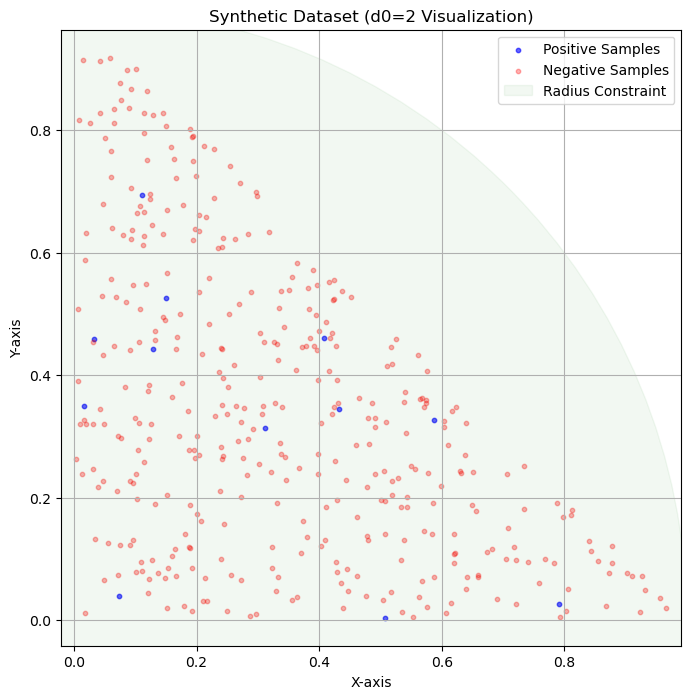

Number of positive samples generated: 12
Number of negative samples generated: 388


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rayleigh

params = calculate_params(P, N)


P_size = 400 // 33
N_size = 400 - P_size
d = 11
d0 = 2
s = 1
r = params['multivariate_normal'][str(d0)]['r']
sigma = params['multivariate_normal'][str(d0)]['sigma']
# sigma = 0.3

def generate_positive_samples(P_size, d, d0, sigma, r):
    samples = []
    while len(samples) < P_size:
        point = np.random.normal(loc=0, scale=sigma, size=d0)
        length = np.linalg.norm(point, ord=1)
        if length <= r and np.all(point >= 0):
            full_point = np.zeros(d)
            full_point[:d0] = point
            samples.append(full_point)
    return np.array(samples)

def generate_negative_samples(N_size, d, d0, s):
    samples = []
    while len(samples) < N_size:
        point = np.random.uniform(low=0, high=s, size=d0)
        if np.sum(point) <= s:
            full_point = np.zeros(d)
            full_point[:d0] = point
            samples.append(full_point)
    return np.array(samples)

P = generate_positive_samples(P_size, d, d0, sigma, r)
N = generate_negative_samples(N_size, d, d0, s)

x_pos, y_pos = P[:, 0], P[:, 1]
x_neg, y_neg = N[:, 0], N[:, 1]

plt.figure(figsize=(8, 8))
plt.scatter(x_pos, y_pos, color='blue', alpha=0.6, label='Positive Samples', s=10)
plt.scatter(x_neg, y_neg, color='red', alpha=0.3, label='Negative Samples', s=10)

circle = plt.Circle((0, 0), r, color='green', alpha=0.05, label='Radius Constraint')
plt.gca().add_artist(circle)

plt.title(f'Synthetic Dataset (d0={d0} Visualization)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()

print(f"Number of positive samples generated: {len(P)}")
print(f"Number of negative samples generated: {len(N)}")
